In [2]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from zipfile import ZipFile
zipEnem = 'microdados_enem_2019.zip'

In [4]:
with zipfile.ZipFile('microdados_enem_2019.zip') as z:
    print(*z.namelist(),sep="\n")

LEIA-ME E DOCUMENTOS TÉCNICOS/
LEIA-ME E DOCUMENTOS TÉCNICOS/matriz_referencia_enem.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/Leia_Me_Enem_2019.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/manual_de_redacao_do_enem_2019.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/Edital_enem_2019.pdf
PROVAS E GABARITOS/
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO_AMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO_SUPERAMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_03_DIA_1_BRANCO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_04_DIA_1_ROSA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_09_DIA_1_LARANJA_LEDOR.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_10_DIA_1_VERDE_LIBRAS.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_05_DIA_2_AMARELO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO.pdf.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO_AMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO_SUPERAMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_03_D

In [5]:
with zipfile.ZipFile('microdados_enem_2019.zip') as z:
    with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as dado:
        enemdados = pd.read_csv(dado,sep=';',encoding='ISO-8859-1')

In [6]:
enemdados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [7]:
#Selecionar dados relevantes
dadosdeanalise = enemdados[['SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_COR_RACA','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT','NU_NOTA_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5','TP_ESCOLA','Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']]

In [8]:
dadosdeanalise.to_csv('dadosdeanalise.csv')
#salvar dados em uma tabela

In [9]:
tabeladeuso=pd.read_csv('dadosdeanalise.csv')


In [10]:
tabeladeuso= tabeladeuso.dropna()

In [11]:
tabeladeuso = tabeladeuso.loc[
      (tabeladeuso['NU_NOTA_CN'].notnull())  & (tabeladeuso['NU_NOTA_CN'] != 0) & (tabeladeuso['NU_NOTA_CH'].notnull())      & (tabeladeuso['NU_NOTA_CH'] != 0) 
    & (tabeladeuso['NU_NOTA_LC'].notnull())  & (tabeladeuso['NU_NOTA_LC'] != 0) & (tabeladeuso['NU_NOTA_REDACAO'].notnull()) & (tabeladeuso['NU_NOTA_REDACAO'] != 0)    
]

In [12]:
tabeladeuso.isnull().sum()

Unnamed: 0          0
SG_UF_RESIDENCIA    0
NU_IDADE            0
TP_SEXO             0
TP_COR_RACA         0
NU_NOTA_CN          0
NU_NOTA_CH          0
NU_NOTA_LC          0
NU_NOTA_MT          0
NU_NOTA_REDACAO     0
NU_NOTA_COMP1       0
NU_NOTA_COMP2       0
NU_NOTA_COMP3       0
NU_NOTA_COMP4       0
NU_NOTA_COMP5       0
TP_ESCOLA           0
Q001                0
Q002                0
Q003                0
Q004                0
Q005                0
Q006                0
Q007                0
Q008                0
Q009                0
Q010                0
Q011                0
Q012                0
Q013                0
Q014                0
Q015                0
Q016                0
Q017                0
Q018                0
Q019                0
Q020                0
Q021                0
Q022                0
Q023                0
Q024                0
Q025                0
dtype: int64

In [13]:
#Atribuindo a legenda presente nos dicionarios as variaveis

#Possui internet em casa?
tabeladeuso['Q025'] = tabeladeuso['Q025'].map({'A':'Não', 'B':'Sim'})

#Escolaridade da mãe
tabeladeuso['Q002'] = tabeladeuso['Q002'].map({'A':'Nunca estudou', 'B':'Não completou EF', 'C':'Não completou EF',
                                'D':'Não completou EM', 'E':'Não completou ES', 'F':'Graduada',
                                'G':'Pós-graduada','H':'Não sabe'})

#Renda familiar (incluindo a do aluno)
tabeladeuso['Q006'] = tabeladeuso['Q006'].map({'A':'Nenhuma renda', 'B':'Até 1.320', 'C':'Até 1.320',
                                 'D':'Até 3.520', 'E':'Até 3.520', 'F':'Até 3.520', 'G':'Até 3.520',
                                 'H':'Até 10.560','I':'Até 10.560', 'J':'Até 10.560','K':'Até 10.560',
                                 'L':'Até 10.560','M':'Até 10.560','N':'Até 10.560',
                                 'O':'Mais de 10.560','P':'Mais de 10.560','Q':'Mais de 10.560'})

#Tipo de escola
tabeladeuso['TP_ESCOLA'] = tabeladeuso['TP_ESCOLA'].map({1:'Não respondeu', 2:'Pública', 3:'Privada', 4:'Exterior'})
#raça
tabeladeuso['TP_COR_RACA'] = tabeladeuso['TP_COR_RACA'].map({0:'NA', 6:'NA', 1:'Branca', 2:'Preta', 3:'Parda',4:'Amarela', 5:'Indígena'})

#Possui TV em casa?
tabeladeuso['Q019'] = tabeladeuso['Q019'].map({'A':'Não', 'B':'Sim, uma', 'C':'Sim, duas', 'D':'Sim, trÊs','E':'Sim, 4 ou mais'})

#Possui celular em casa?
tabeladeuso['Q022'] = tabeladeuso['Q022'].map({'A':'Não', 'B':'Sim, um', 'C':'Sim, dois', 'D':'Sim, trÊs','E':'Sim, 4 ou mais'})

#Possui computador em casa?
tabeladeuso['Q024'] = tabeladeuso['Q024'].map({'A':'Não', 'B':'Sim, um', 'C':'Sim, dois', 'D':'Sim, trÊs','E':'Sim, 4 ou mais'})

## Overview geral dos dados

In [14]:
#Nº de pessoas por raça
print("Nº de pessoas por raça")
tabeladeuso['TP_COR_RACA'].value_counts()

Nº de pessoas por raça


Parda       1635530
Branca      1347128
Preta        438055
Amarela       82233
NA            70609
Indígena      20170
Name: TP_COR_RACA, dtype: int64

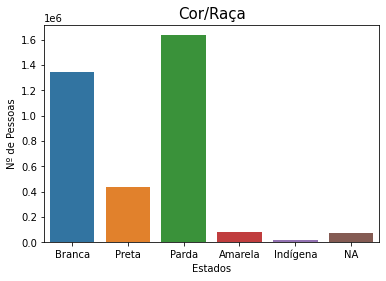

In [15]:
#Grafico quantidade de pessoas por raça
sns.countplot(tabeladeuso['TP_COR_RACA'], orient='h')
plt.title('Cor/Raça', size=15)
plt.xlabel("Estados")
plt.ylabel("Nº de Pessoas")
plt.show()

In [16]:
#Olhar numero de participantes por eestado

print('Nº de pessoas estado')
tabeladeuso['SG_UF_RESIDENCIA'].value_counts()

Nº de pessoas estado


SP    570358
MG    384551
BA    279893
RJ    238492
CE    211290
PA    199751
PE    194509
MA    157152
RS    153002
PR    147944
GO    120671
PB    110423
PI     90673
RN     87745
SC     77615
AM     70965
ES     70558
AL     66112
DF     65219
MT     58084
SE     56148
MS     47379
RO     39319
TO     32695
AP     28373
AC     26377
RR      8427
Name: SG_UF_RESIDENCIA, dtype: int64

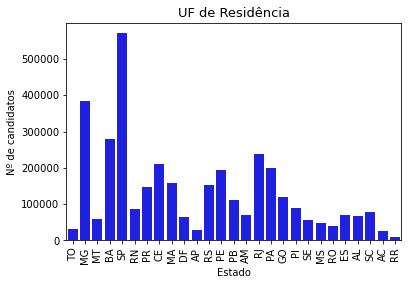

In [17]:
# Gráfico nº de pessoas por estado
sns.countplot(tabeladeuso['SG_UF_RESIDENCIA'], orient='h', color='blue')
plt.title('UF de Residência', size=13)
plt.xticks(rotation=90)
plt.xlabel("Estado")
plt.ylabel("Nº de candidatos")
plt.show()

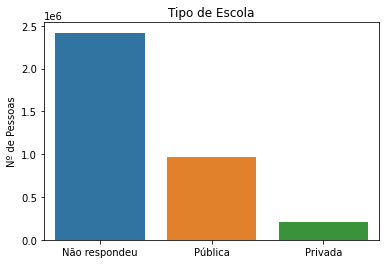

In [18]:
#pessoas por escola
sns.countplot(tabeladeuso['TP_ESCOLA'], orient='h')
plt.title('Tipo de Escola', size=12)
plt.xlabel("")
plt.ylabel("Nº de Pessoas")
plt.show()

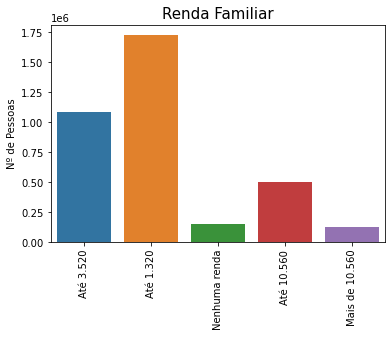

In [19]:
#Grafico Renda familiar
sns.countplot(tabeladeuso['Q006'], orient='h')
plt.title('Renda Familiar', size=15)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Nº de Pessoas")
plt.show()

# Inicio das análises e observações do relatorio

Legendas:
Q025:Acesso à Internet


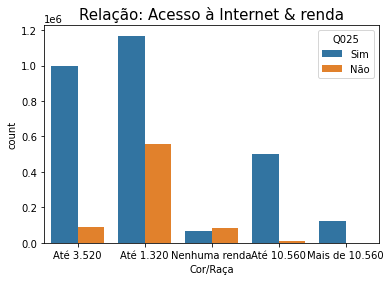

In [20]:
# Relação do acesso a internet e renda
sns.countplot(x="Q006", hue="Q025", data=tabeladeuso)
plt.title('Relação: Acesso à Internet & renda',size=15)
plt.xlabel("Cor/Raça")
print('Legendas:\nQ025:Acesso à Internet')

#comentar sobre acessibilidade e sobre as pessoas sem internet fazendo enem


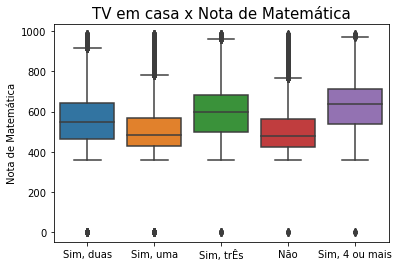

In [21]:
#Relação entre nota de matematica e com TV
sns.boxplot(x=tabeladeuso['Q019'], y=tabeladeuso['NU_NOTA_MT'])
plt.title('TV em casa x Nota de Matemática',size=15)
plt.xlabel("")
plt.ylabel("Nota de Matemática")
plt.show()

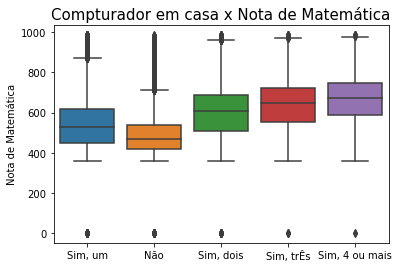

In [22]:
#Relação entre nota de matematica e computador
sns.boxplot(x=tabeladeuso['Q024'], y=tabeladeuso['NU_NOTA_MT'])
plt.title('Compturador em casa x Nota de Matemática',size=15)
plt.xlabel("")
plt.ylabel("Nota de Matemática")
plt.show()

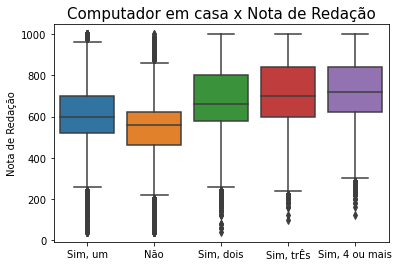

In [23]:
#Relação entre nota de redaão e computador
sns.boxplot(x=tabeladeuso['Q024'], y=tabeladeuso['NU_NOTA_REDACAO'])
plt.title('Computador em casa x Nota de Redação',size=15)
plt.xlabel("")
plt.ylabel("Nota de Redação")
plt.show()

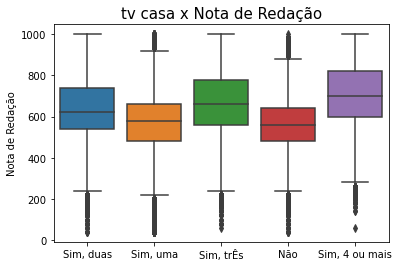

In [24]:
#Relação entre nota de redaão e tv
sns.boxplot(x=tabeladeuso['Q019'], y=tabeladeuso['NU_NOTA_REDACAO'])
plt.title('tv casa x Nota de Redação',size=15)
plt.xlabel("")
plt.ylabel("Nota de Redação")
plt.show()

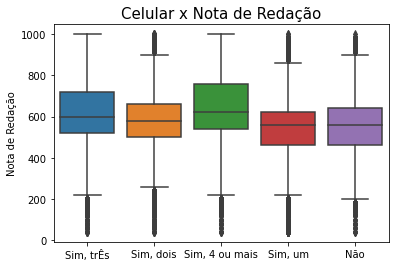

In [25]:
#Relação entre nota de redaão e cel
sns.boxplot(x=tabeladeuso['Q022'], y=tabeladeuso['NU_NOTA_REDACAO'])
plt.title('Celular x Nota de Redação',size=15)
plt.xlabel("")
plt.ylabel("Nota de Redação")
plt.show()

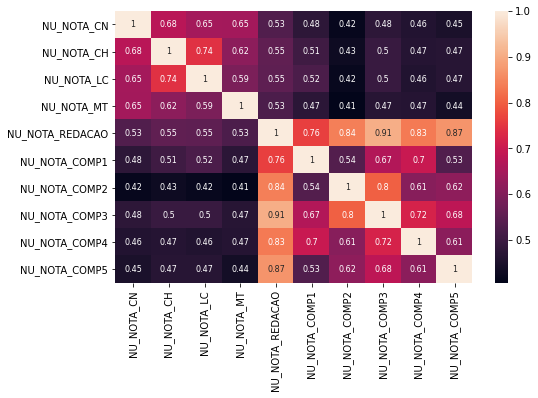

In [26]:
corr = tabeladeuso.filter(items=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT','NU_NOTA_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']).corr()
ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corr,  annot=True, annot_kws={"size": 8})

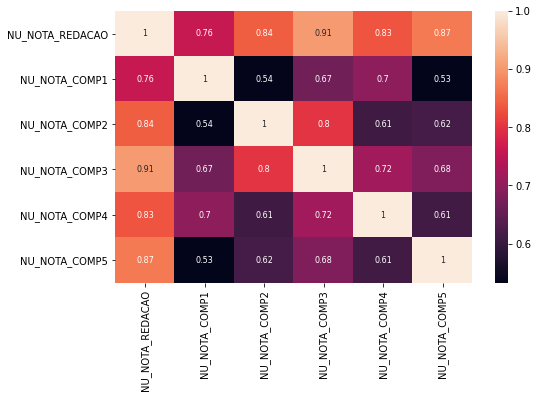

In [27]:
corr = tabeladeuso.filter(items=['NU_NOTA_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']).corr()
ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corr,  annot=True, annot_kws={"size": 8})